
# Emotion Detection Graphs Analysis

This notebook provides visualization and analysis of the results from the emotion detection models. It includes various plots and graphs to illustrate the distribution and accuracy of the predicted emotions.

## Table of Contents
1. Emotion Distribution
2. Confidence Levels
3. Model Comparison
    

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


## Emotion Distribution

In this section, we visualize the distribution of emotions detected by the model. This helps in understanding which emotions are most frequently detected and the overall distribution across different emotions.
            

In [13]:
main_path = 'outputdata/'
models = ['Riley_4', 'Riley_12', 'vggface']
people = ['person1', 'person2', 'person3']

In [30]:
data = pd.DataFrame()
for model in models:
    for person in people:
        print('Reading ' + person + ' ' + model)
        da = pd.read_csv(main_path + person + '_' + model + '.csv')
        da['model'] = model
        da['person'] = person
        data = pd.concat([data, da])


Reading person1 Riley_4
Reading person2 Riley_4
Reading person3 Riley_4
Reading person1 Riley_12
Reading person2 Riley_12
Reading person3 Riley_12
Reading person1 vggface
Reading person2 vggface
Reading person3 vggface


In [58]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.emotion = data.emotion.str.capitalize()


## Model Comparison

This section compares the performance of different emotion detection models. By plotting the results side by side, we can evaluate which model performs better in terms of accuracy and confidence.
            

In [79]:
r4 = data.loc[data.model == 'Riley_4'].groupby('emotion').agg({'confidence': 'mean', 'person': 'count'}).sort_values(by='confidence', ascending=False).reset_index()
r4.loc[len(r4)] = ['Disgust', 0, 0]
r12 = data.loc[data.model == 'Riley_12'].groupby('emotion').agg({'confidence': 'mean', 'person': 'count'}).sort_values(by='confidence', ascending=False).reset_index()
r12.loc[len(r12)] = ['Disgust', 0, 0]
vgg = data.loc[data.model == 'vggface'].groupby('emotion').agg({'confidence': 'mean', 'person': 'count'}).sort_values(by='confidence', ascending=False).reset_index()

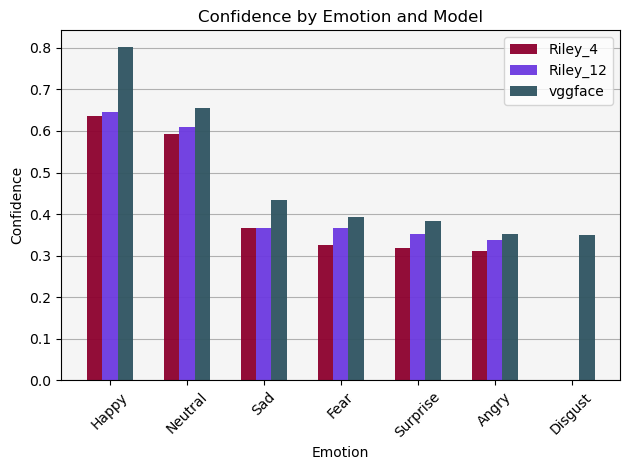

In [132]:
bar_width = 0.2

# Set positions of the bars on the x-axis
r4_pos = np.arange(len(r4['emotion']))
r12_pos = [x + bar_width for x in r4_pos]
vgg_pos = [x + bar_width for x in r12_pos]

# Create the plot
fig, ax = plt.subplots()

bar1 = ax.bar(r4_pos, r4['confidence'], color='#8d002e', width=bar_width, label='Riley_4', alpha=0.95)
bar2 = ax.bar(r12_pos, r12['confidence'], color='#6c39e0', width=bar_width, label='Riley_12', alpha=0.95)
bar3 = ax.bar(vgg_pos, vgg['confidence'], color='#2f5461', width=bar_width, label='vggface', alpha=0.95)

# Add xticks on the middle of the group bars
ax.set_xlabel('Emotion')
ax.set_ylabel('Confidence')
ax.set_title('Confidence by Emotion and Model')
ax.set_xticks([r + bar_width for r in range(len(r4['emotion']))])
ax.set_xticklabels(r4['emotion'])

# Add grid, background color, and margins
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('#f5f5f5')

# Add a legend
ax.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45)


# Adjust layout to fit everything
plt.tight_layout()

plt.show()


## Confidence Levels

Here, we plot the confidence levels of the predicted emotions. The confidence levels indicate how certain the model is about its predictions, providing insights into the reliability of the detection.
            

In [195]:
emo_colors = {
    'Angry': '#af1020',
    'Disgust': '#00af50',
    'Fear': '#703020',
    'Happy': '#b09030',
    'Sad': '#20707f',
    'Surprise': '#8f408f',
    'Neutral': '#556080'
}


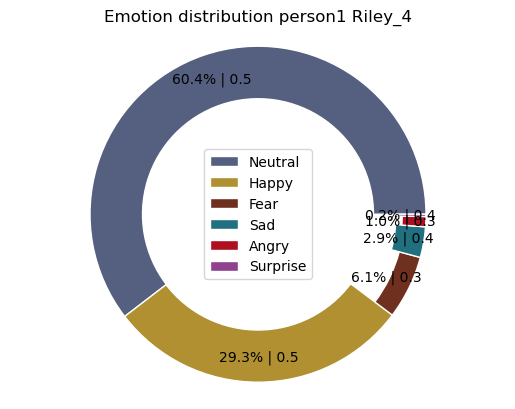

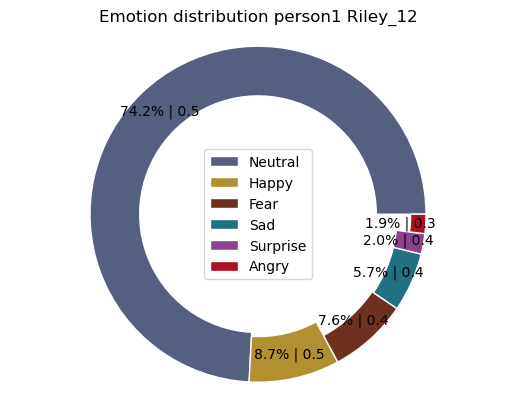

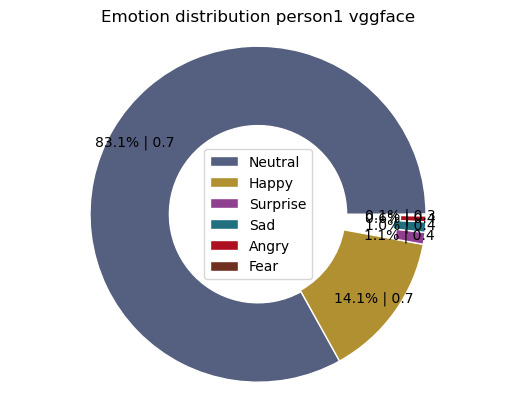

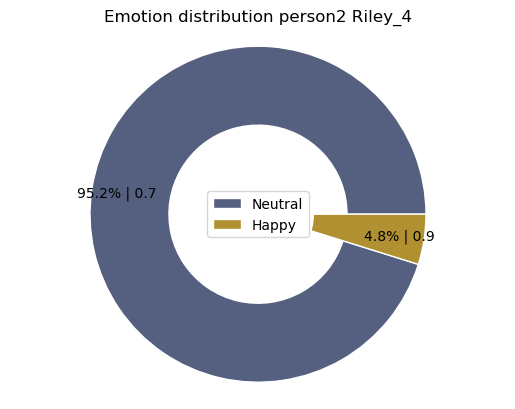

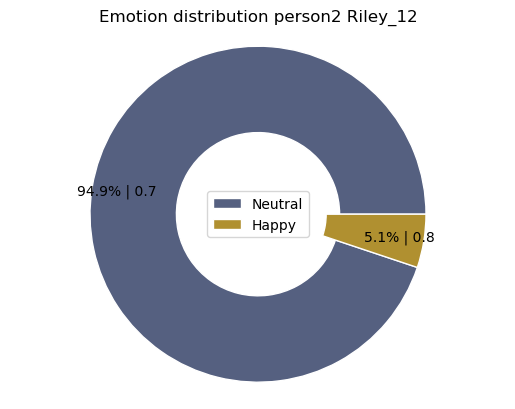

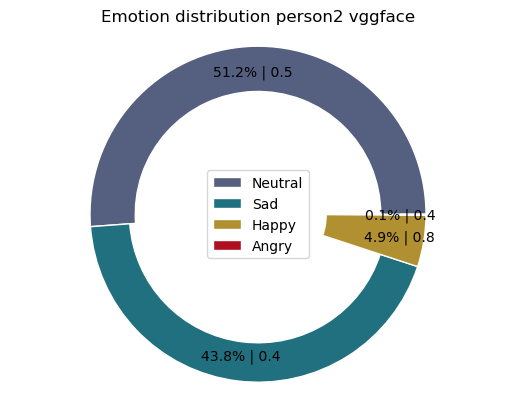

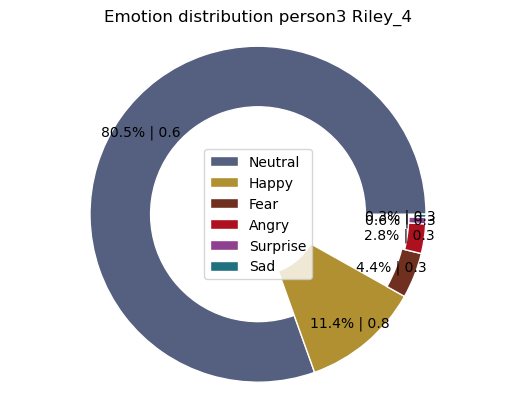

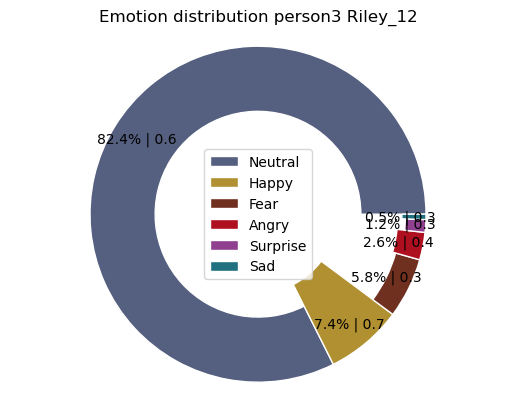

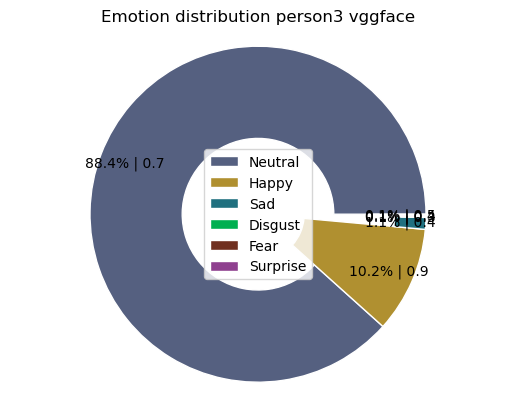

In [197]:
for person in people:
    for model in models:
        fig, ax = plot_emotion_distribution(
            data.loc[(data.model == model) & (data.person == person)].groupby('emotion').agg({'confidence':'mean', 'frame':'count'}).reset_index().sort_values(by='frame', ascending=False)
            , person, model)

        fig.savefig('img/' + person + '_' + model + '_sum.png')

In [161]:
def plot_emotion_distribution(data, person, model_name):
    # Initialize plot
    fig, ax = plt.subplots()

    # Inner ring: Confidence levels
    size = 0
    total_frames = sum(data['frame'])
    start_angle = 0

    patches_list = []

    for i, row in data.iterrows():
        emotion = row['emotion']
        frame_count = row['frame']
        confidence = row['confidence']
        color = emo_colors.get(emotion, '#808080')  # Default to gray if emotion is not found

        # Calculate the angle for each segment
        percentage = frame_count / total_frames
        angle = percentage * 360
        width = 0.8 - (1 - confidence)  # Adjust the thickness based on the confidence level

        # Draw the inner ring segment
        ring = patches.Wedge(center=(0,0), r=1-size, theta1=start_angle, theta2=start_angle+angle, width=width, facecolor=color, edgecolor='w')
        ax.add_patch(ring)
        patches_list.append(ring)

        # Calculate the position for the label
        mid_angle = (start_angle + start_angle + angle) / 2
        x = 0.85 * np.cos(np.radians(mid_angle))
        y = 0.85 * np.sin(np.radians(mid_angle))
        ax.text(x, y, f'{percentage*100:.1f}% | {confidence:.1f}', ha='center', va='center')

        start_angle += angle

    # Add legend
    ax.legend(patches_list, data['emotion'], loc='center')

    ax.set_title(f'Emotion distribution {person} {model_name}')
    ax.axis('off')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')

    return fig, ax
